In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports and Loading data

In [4]:
COLUMN_NAMES = ['Unnamed: 0', 'siteCode', 
                'objectUAI', 'machine', 
                'fluid','measurement',
                'step', 'sourceTimestamp', 
                'pji', 'dataValue',
                'body_type', 'driving_side', 
                'gearbox_type', 'hybrid_level',
                'engine_type']

In [13]:
!ls data/

cleaned_df_ropit.csv extract.csv          train_df_LHA.csv
df_ropit.csv         inference_df_LHA.csv


In [ ]:
# Initial data import and removing of duplicates
df = pd.read_csv('data/cleaned_df_ropit.csv', 
                usecols= COLUMN_NAMES[4:],
                #nrows=4_000_000, 
                #skiprows=range(10_588_994, 10_589_041)
                )
print(df.shape)

df = df.drop_duplicates().sort_values('sourceTimestamp').reset_index(drop=True)
print(df.shape)
df

In [ ]:
#df.to_csv('data/final_df_ropit.csv', index=False )

**IMPORTANT** ~ 20% of duplicated values in the data

**FALSE** 20% percent in the first 1M lines but increases along the file ~50% at 4M Lines, 75% when all file is read

In [36]:
# Actual data import
df = pd.read_csv('data/final_df_ropit.csv',index_col='Unnamed: 0')
df

/Users/alix/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,fluid,measurement,step,sourceTimestamp,pji,dataValue,body_type,driving_side,gearbox_type,hybrid_level,engine_type
0,FRFluid,ActVacuum,StepPumpPreVacuum,2021-05-11 07:01:00.565 UTC,911412,1,BJI,DG,BVM6,HYB01,H4D
1,FRFluid,ActVacuum,StepPumpPreVacuum,2021-05-11 07:01:15.465 UTC,911412,1,BJI,DG,BVM6,HYB01,H4D
2,RMFluid,ActVacuum,StepVacuum1,2021-05-11 07:01:18.971 UTC,911412,6,BJI,DG,BVM6,HYB01,H4D
3,RMFluid,ActVacuum,StepVacuum1,2021-05-11 07:01:53.272 UTC,911412,63,BJI,DG,BVM6,HYB01,H4D
4,RMFluid,ActVacuum,StepVacuum1,2021-05-11 07:01:53.865 UTC,911412,59,BJI,DG,BVM6,HYB01,H4D
...,...,...,...,...,...,...,...,...,...,...,...
3036862,FRFluid,ActLoadingPressure,StepEndLoading,2021-05-26 23:58:18.197 UTC,2720139,479,BJI,DG,BVM6,HYB01,H4D
3036863,FRFluid,ActLoadingPressure,StepEndLoading,2021-05-26 23:58:18.497 UTC,2720139,461,BJI,DG,BVM6,HYB01,H4D
3036864,FRFluid,ActLoadingPressure,StepEndLoading,2021-05-26 23:58:18.593 UTC,2720139,458,BJI,DG,BVM6,HYB01,H4D
3036865,FRFluid,ActLoadingPressure,StepEndLoading,2021-05-26 23:58:18.796 UTC,2720139,456,BJI,DG,BVM6,HYB01,H4D


In [37]:
df.isna().sum()

fluid                   0
measurement             0
step                    0
sourceTimestamp         0
pji                     0
dataValue               0
body_type          212834
driving_side       212834
gearbox_type       212834
hybrid_level       212834
engine_type        212834
dtype: int64

In [75]:
df.head()

,Unnamed: 0,siteCode,objectUAI,machine,fluid,measurement,step,sourceTimestamp,pji,dataValue,body_type,driving_side,gearbox_type,hybrid_level,engine_type
0,0,ROPIT,A00003JRF1,FillingStation_2,RMFluid,ActVolume,StepLoading,2021-05-24 12:11:20.51 UTC,1711462,332,HJD,DG,BVM6,HYB01,H4D
1,1,ROPIT,A00003JRF1,FillingStation_2,HFOFluid,ActMass,StepLoading,2021-05-24 09:24:33.799 UTC,1711484,332,HJD,DG,BVM6,HYB01,H4D
2,2,ROPIT,A00003JRF1,FillingStation_2,HFOFluid,ActMass,StepLoading,2021-05-24 21:36:58.006 UTC,1711717,332,HJD,DD,BVM6,HYB01,H4D
3,3,ROPIT,A00003JRF1,FillingStation_2,RMFluid,ActVolume,StepLoading,2021-05-24 08:46:48.004 UTC,1711735,396,HJD,DD,BVM6,HYB01,H4D
4,4,ROPIT,A00003JRF1,FillingStation_2,RMFluid,ActVolume,StepLoading,2021-05-24 09:50:16.205 UTC,1821133,428,BJI,DG,BVM6,HYB01,H4D


# EDA general organization of the data

<AxesSubplot:xlabel='machine', ylabel='Count'>

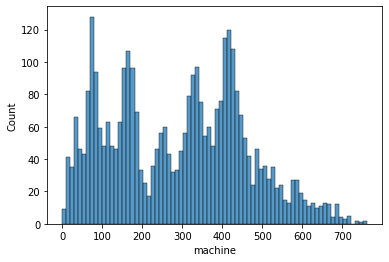

In [24]:
temp = df.groupby('pji').count().reset_index()
sns.histplot(x=temp['machine'], binwidth=10)

## Ananlysis of car types

In [50]:
vehicules = df.loc[:, ['pji', 'body_type','driving_side','gearbox_type','hybrid_level','engine_type']].drop_duplicates()

In [52]:
vehicules.iloc[:, 1:].describe()

,body_type,driving_side,gearbox_type,hybrid_level,engine_type
count,3599,3599,3599,3599,3599
unique,5,2,6,3,8
top,HJD,DG,BVM6,HYB01,H4D
freq,2327,3218,3084,3374,1955


**NOTE:** Percentage of production for the 10 most important models

Sum of this 10 model represent more than 90% of total production

In [55]:
temp = vehicules.groupby(['body_type', 'gearbox_type', 'engine_type', 'driving_side', 'hybrid_level'])[['pji']].\
count(). \
reset_index().\
sort_values('pji', ascending=False) 
#reset_index() 
temp['pji'] = temp.pji / vehicules.shape[0] * 100
temp.rename(columns={'pji':'percentage_of_production'}).head(10)

,body_type,gearbox_type,engine_type,driving_side,hybrid_level,percentage_of_production
6,BJI,BVM6,H4D,DG,HYB01,23.011583
23,HJD,BVM6,K9K,DG,HYB01,21.389961
17,HJD,BVM6,H4D,DG,HYB01,14.851995
20,HJD,BVM6,H5H,DG,HYB01,6.280566
7,BJI,CVTX,H4D,DG,HYB01,4.427284
29,LJI,BVM6,H4D,DG,HYB01,4.015444
16,HJD,BVM6,H4D,DD,HYB01,3.963964
13,HJD,BVM5,H4M,DG,HYB01,3.449163
19,HJD,BVM6,H5H,DD,HYB01,2.651223
21,HJD,BVM6,K9K,DD,HYB01,2.342342


RMQ: The number of lines per vehicule appears to be ~ bimodal. One peak at ~100 and another at ~350

## Plot values for a single vehicule

Randomly select one car based on pji and plot measurement values for each fluid

In [112]:
# Get unique pji far all vehicules
names = pd.Series(df.pji.unique())

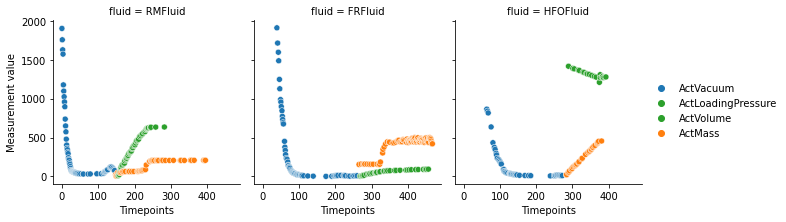

In [136]:
temp = df[df.pji.isin(names.sample(1#, random_state=0
                                  ))]
temp.reset_index(drop= True, inplace=True)
temp.reset_index(inplace=True)

#temp

g = sns.FacetGrid(data=temp, col='fluid')
g.map_dataframe(sns.scatterplot, x='index', y='dataValue', hue='measurement' )
g.set_xlabels('Timepoints')
g.set_ylabels('Measurement value')
g.add_legend()

Measurement = 

    - ActLoadingPressure for FR and RM, 
    
    - ActVolume for HFO

QUESTION: Percentage of car with values for all three final loading steps

`
3    83.562520
2    15.190278
1     1.247202`

In [33]:
temp = df[df['step'] == 'StepLoading']\
.groupby(['pji', 'fluid'])[['dataValue']]\
.count()\
.reset_index('fluid')

In [ ]:
temp = temp.groupby('pji')['fluid'].count().value_counts() / temp.index.nunique() * 100

## Changes in measurement values during the different phases

QUESTION: What is the distribution of the measurements for the different fluids ? (Loading phase)

In [ ]:
filling = df[df['measurement'].isin(['ActLoadingPressure', 'ActVolume'])]
temp = filling.groupby(['fluid','pji']) \
    .agg({'dataValue':['min', 'mean', 'median', 'max']})

temp.columns = [n[1] for n in temp.columns]
temp.reset_index(inplace=True)
temp = temp.melt(id_vars=['fluid', 'pji'], value_vars=['min', 'mean', 'median', 'max'])

temp

<AxesSubplot:xlabel='fluid', ylabel='value'>

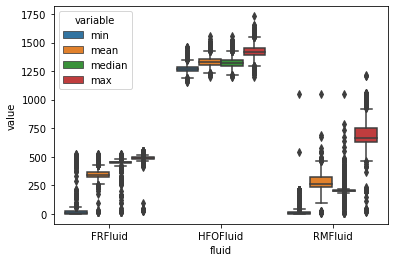

In [114]:
sns.boxplot(data=temp, x='fluid', y='value', hue='variable', showfliers='False')


In [91]:
def plot_fluids(df, x, y):
    """Plot x and y on separate suplots for each fluid"""
    fig, ax = plt.subplots(1, 3, figsize= (14, 5))
    temp = df[df['fluid'] ==  'FRFluid']
    sns.scatterplot(data=temp, x=x, y=y, ax=ax[0], color='g')
    ax[0].set_title('FRFluid')

    temp = df[df['fluid'] == 'HFOFluid']
    sns.scatterplot(data=temp, x=x, y=y,  ax=ax[1], color='b')
    ax[1].('HFOFluid')

    temp = df[df['fluid'] == 'RMFluid']
    sns.scatterplot(data=temp, x=x, y=y,  ax=ax[2], color='r')
    ax[2].set_title('RMFluid')

QUESTION what is the shape of non-working filling for a given car

- FRfluid values < 400 are weird
- HFOFLuid values < 1100 are weird
- RM fluid no patter so far

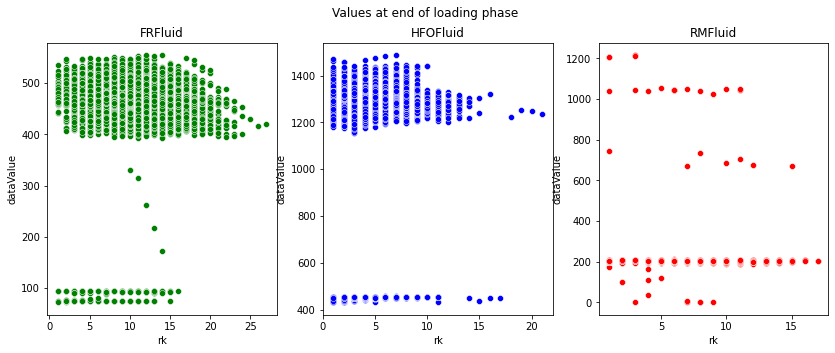

In [104]:
temp = df[df['step'] == 'StepEndLoading'].copy()
temp.sort_values('sourceTimestamp', inplace=True)
temp['rk'] = temp.groupby('pji').cumcount()+1

plot_fluids(temp, x='rk', y='dataValue')
plt.suptitle('Values at end of loading phase');

Text(0.5, 0.98, 'Values during Loading Phase')

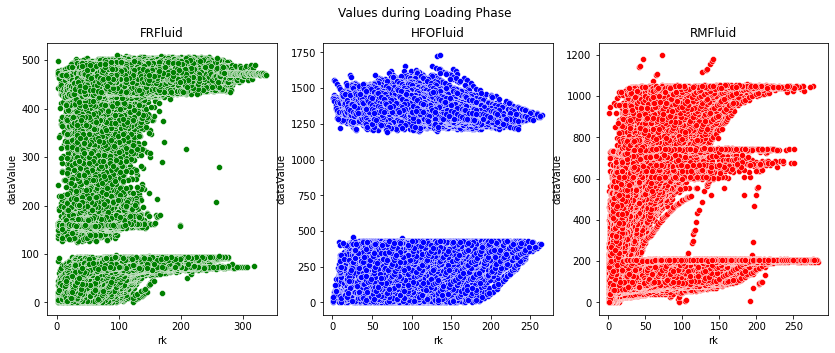

In [105]:
temp = df[df['step'] == 'StepLoading'].copy()
temp.sort_values('sourceTimestamp', inplace=True)
temp['rk'] = temp.groupby('pji').cumcount()+1

plot_fluids(temp, x='rk', y='dataValue')
plt.suptitle('Values during Loading Phase')

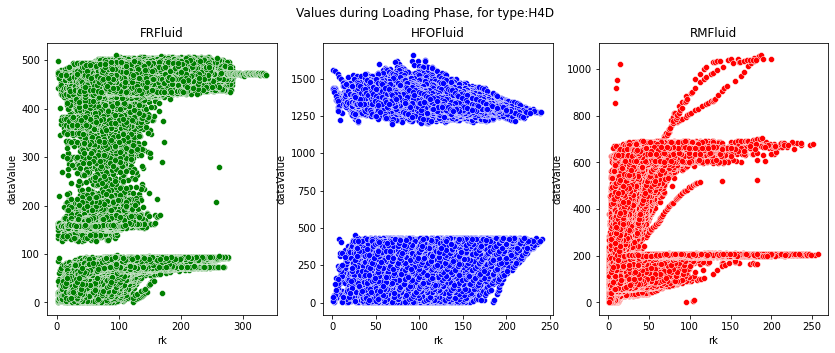

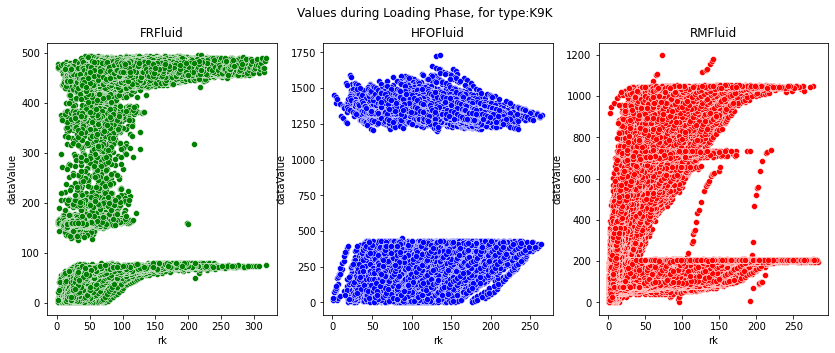

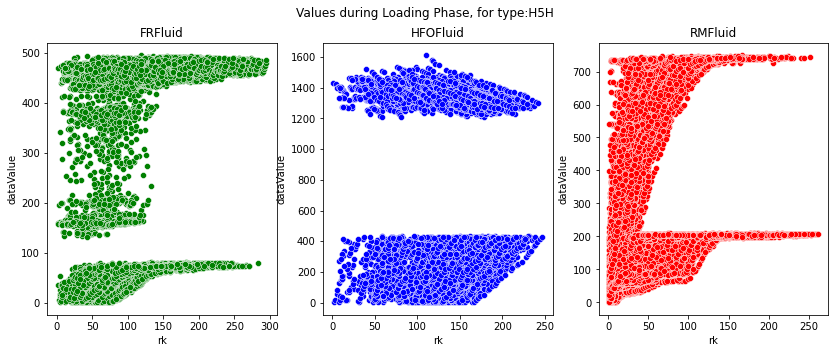

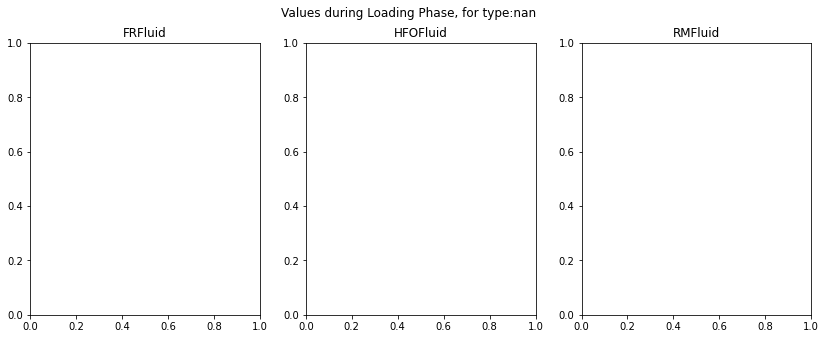

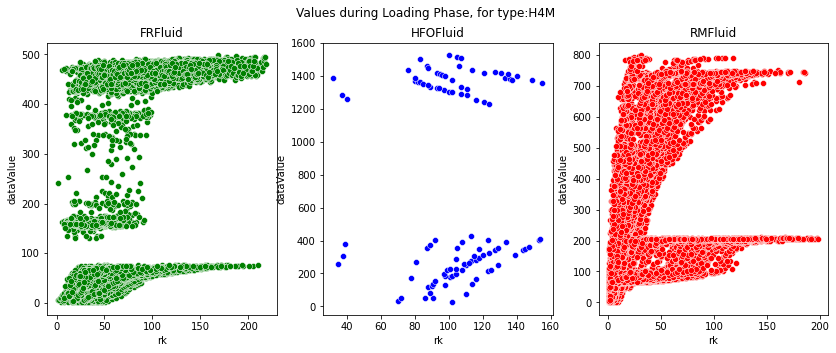

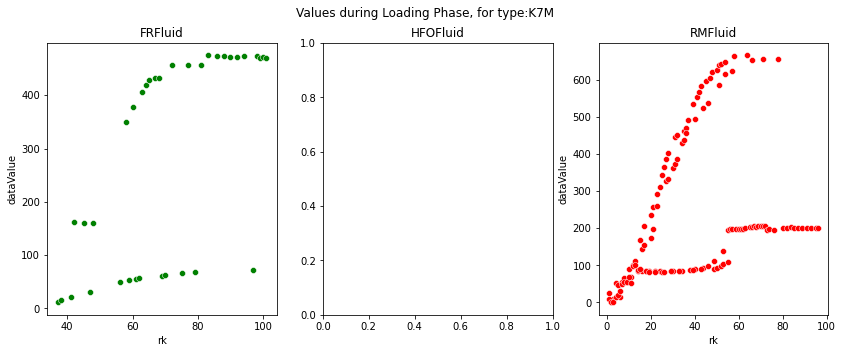

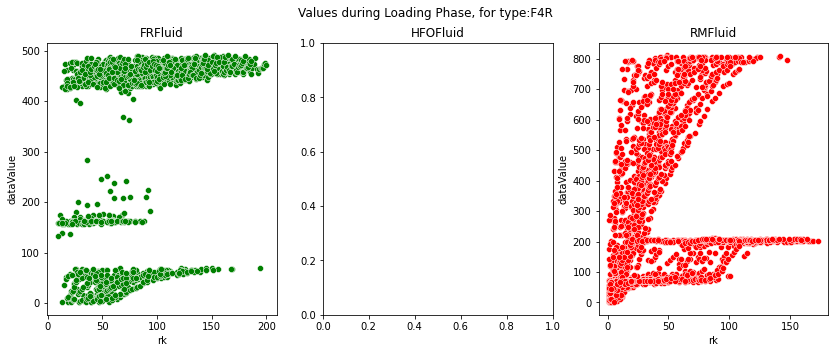

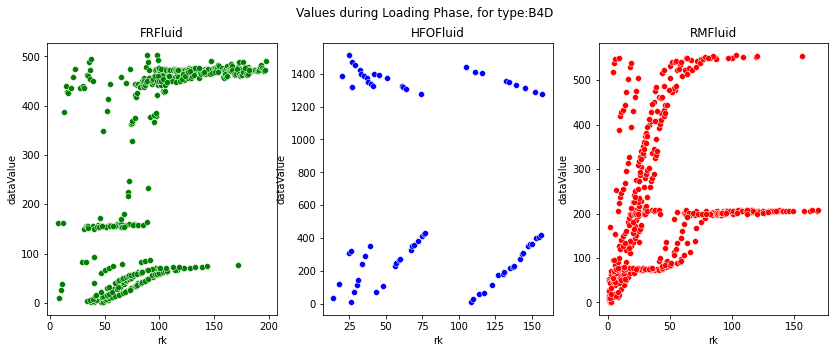

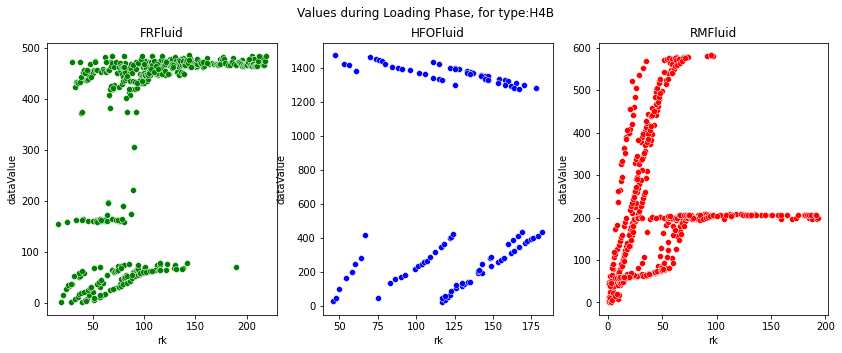

In [122]:
for etype in df.engine_type.unique():
    temp = df[(df['step'] == 'StepLoading') & (df.engine_type == etype)].copy()
    temp.sort_values('sourceTimestamp', inplace=True)
    temp['rk'] = temp.groupby('pji').cumcount()+1

    plot_fluids(temp, x='rk', y='dataValue')
    plt.suptitle(f'Values during Loading Phase, for type:{etype}')

In [60]:
temp[temp['dataValue'] < 350].select_dtypes(include='object').describe(include='all')

,machine,fluid,measurement,step,sourceTimestamp,body_type,driving_side,gearbox_type,hybrid_level,engine_type
count,192,192,192,192,192,181,181,181,181,181
unique,1,1,2,1,192,3,2,3,2,4
top,FillingStation_2,FRFluid,ActVolume,StepEndLoading,2021-05-11 07:15:18.669 UTC,BJI,DG,BVM6,HYB01,H4D
freq,192,192,187,192,1,102,179,166,180,134


In [8]:
df.measurement.unique()

array(['ActVolume', 'ActMass', 'ActVacuum', 'ActLoadingPressure'],
      dtype=object)

In [13]:
df.shape, df.drop_duplicates().shape

((1000000, 15), (1000000, 15))

# New heading